Original Matrix:
 [[ 1 -1 -1  1  1]
 [-1 -1  1 -1  1]
 [ 1 -1 -1 -1 -1]
 [-1 -1  1 -1  1]
 [ 1  1 -1 -1  1]]

Absolute Row-wise Moving Average (Sliced):
      1    2    3    4
0  0.0  1.0  0.0  1.0
1  1.0  0.0  0.0  0.0
2  0.0  1.0  1.0  1.0
3  1.0  0.0  0.0  0.0
4  1.0  0.0  1.0  0.0
Initial figure of merit: 9.0


/tmp/ipykernel_8222/18367363.py:19: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  row_wise_avg = pd.DataFrame(arrowmatrix).rolling(window=2, axis=1).mean()
/home/shaghparast/anaconda3/envs/VAE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_8222/18367363.py:40: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  row_wise_avg = pd.DataFrame(modified_arrowmatrix).rolling(window=2, axis=1).mean()
/home/shaghparast/anaconda3/envs/VAE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of

Final modified matrix:
[[ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [-1 -1 -1 -1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
Figure of merit progression: [9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 14.0, 14.0, 15.0, 16.0, 16.0, 17.0, 17.0, 17.0, 18.0, 19.0, 20.0]


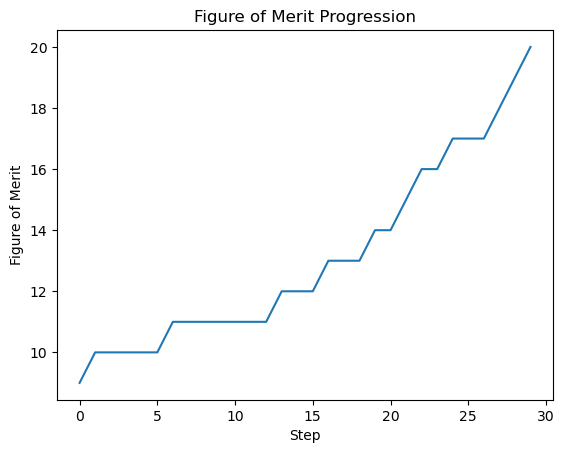

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Generate a 5x5 matrix with values -1 and 1
arrowmatrix = 2 * np.random.randint(low=0, high=2, size=(5, 5)) - 1
print("Original Matrix:\n", arrowmatrix)



 
# Make a copy of the original matrix
modified_arrowmatrix = arrowmatrix.copy()



 
# Calculate initial row-wise moving average and figure of merit
row_wise_avg = pd.DataFrame(arrowmatrix).rolling(window=2, axis=1).mean()
abs_row_wise_avg = np.abs(row_wise_avg.iloc[:, 1:])
print("\nAbsolute Row-wise Moving Average (Sliced):\n", abs_row_wise_avg)
 
polaritymismatch = 1.0 * (abs_row_wise_avg > 0)
figure_merit = np.sum(np.sum(polaritymismatch))
print(f"Initial figure of merit: {figure_merit}")
 
# Initialize figure_merit_score with the initial merit
figure_merit_score = []
figure_merit_score.append(figure_merit)


# Loop through the elements of the matrix to optimize the figure of merit
for u in range(10):
    for i in range(5):
        for j in range(5):
            # Flip the sign of the current element
            modified_arrowmatrix[i, j] = modified_arrowmatrix[i, j] * -1
 
            # Recalculate the moving average and figure of merit
            row_wise_avg = pd.DataFrame(modified_arrowmatrix).rolling(window=2, axis=1).mean()
            abs_row_wise_avg = np.abs(row_wise_avg.iloc[:, 1:])
            polaritymismatch = 1.0 * (abs_row_wise_avg > 0)
            new_figure_merit = np.sum(np.sum(polaritymismatch))
 
            # Compare with the previous figure of merit
            if new_figure_merit >= figure_merit_score[-1]:
                figure_merit_score.append(new_figure_merit)
            else:
                # Revert the change if it does not improve the merit
                modified_arrowmatrix[i, j] = modified_arrowmatrix[i, j] * -1

            

print(f"Final modified matrix:\n{modified_arrowmatrix}")
print(f"Figure of merit progression: {figure_merit_score}")
 
# Plot the progression of the figure of merit
plt.plot(figure_merit_score)
plt.xlabel("Step")
plt.ylabel("Figure of Merit")
plt.title("Figure of Merit Progression")
plt.show()
 

Final modified matrix:
[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1  1  1  1]]
Figure of merit progression: [13.0, 14.0, 16.0, 17.0, 18.0, 19.0]


/tmp/ipykernel_8222/3139161986.py:9: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  row_wise_avg = pd.DataFrame(modified_arrowmatrix).rolling(window=2, axis=1).mean()
/home/shaghparast/anaconda3/envs/VAE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_8222/3139161986.py:9: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  row_wise_avg = pd.DataFrame(modified_arrowmatrix).rolling(window=2, axis=1).mean()
/home/shaghparast/anaconda3/envs/VAE/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The 

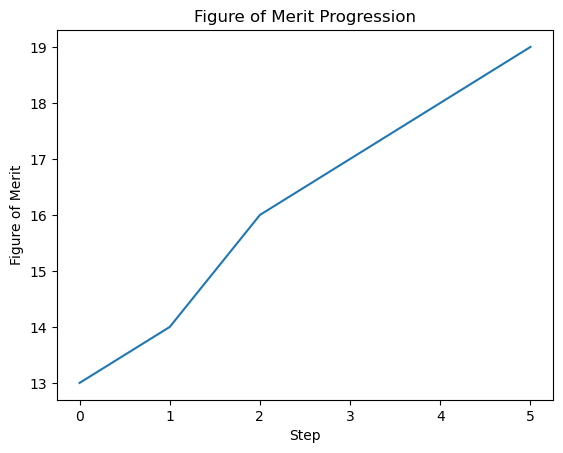